In [580]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [581]:
class neural_network():
    def __init__(self, input_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.onodes = output_nodes
        self.lr = learning_rate

        self.w = np.random.rand(self.onodes, self.inodes) * 0.01
        self.b = np.zeros((self.onodes, 1))

    def train(self, input, target, cost_array):
        output = np.dot(self.w, input) + self.b

        output_error = (output - target)/input.shape[1]

        d_w = np.dot(output_error, input.T)
        d_b = np.sum(output_error, axis = 1, keepdims = True)

        output_array = output_error.reshape(-1)
        cost = np.sum([x*x for x in output_array])
        cost_array.append(cost)

        self.w -= self.lr * d_w
        self.b -= self.lr * d_b

    def query(self, input):
        output = np.dot(self.w, input) + self.b

        return output


In [582]:
training_df = pd.read_csv("training_data/advertising.csv")

training_data_array = training_df.to_numpy()

array_1 = training_data_array[:,:3].T
array_2 = training_data_array[:,3:].T


In [583]:
# create example
inputnodes = 3
outputnodes = 1
learningrate = 0.0000029

n = neural_network(inputnodes, outputnodes, learningrate)

In [584]:
# train the neural network
epochs = 100

cost_array = []
for i in range(epochs):
    n.train(array_1, array_2, cost_array)

In [585]:
print(n.w, n.b)

[[0.01426578 0.01952826 0.00360166]] [[0.00022015]]


Text(0, 0.5, 'sales')

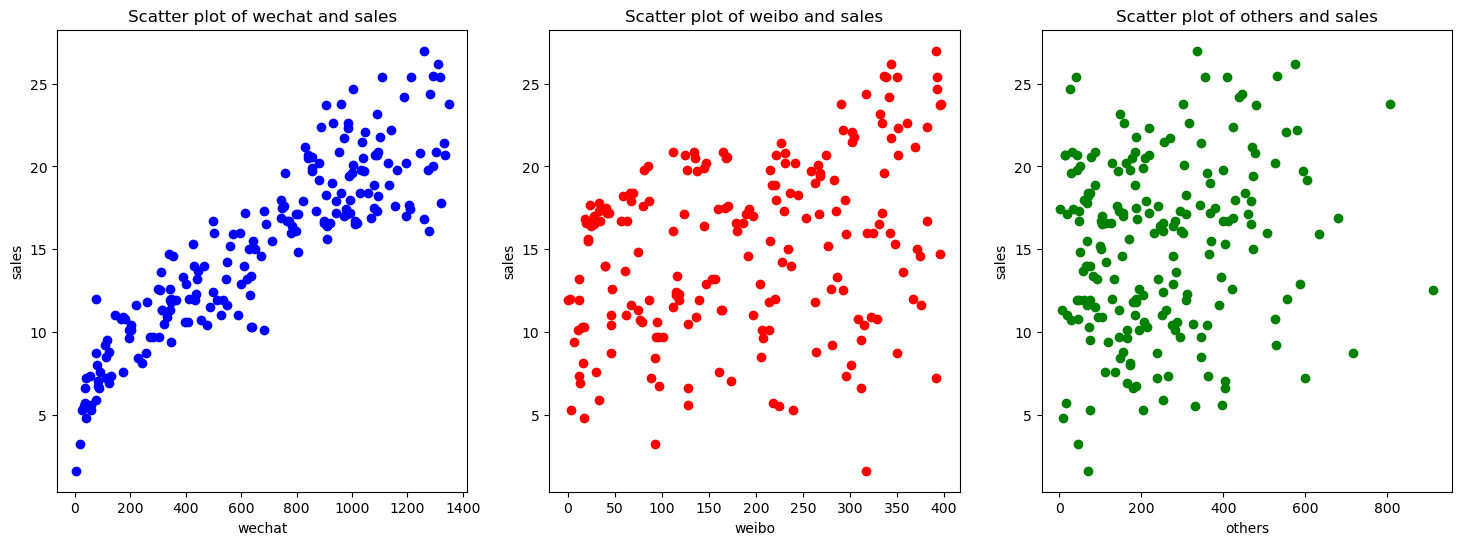

In [586]:
plt.figure(figsize = (18, 6))

plt.subplot(1,3,1)
plt.scatter(training_df['wechat'], training_df['sales'], color = 'blue', marker = 'o')
plt.title("Scatter plot of wechat and sales")
plt.xlabel('wechat')
plt.ylabel('sales')

plt.subplot(1,3,2)
plt.scatter(training_df['weibo'], training_df['sales'], color = 'red')
plt.title("Scatter plot of weibo and sales")
plt.xlabel('weibo')
plt.ylabel('sales')


plt.subplot(1,3,3)
plt.scatter(training_df['others'], training_df['sales'], color = 'green')
plt.title("Scatter plot of others and sales")
plt.xlabel('others')
plt.ylabel('sales')


Text(0, 0.5, 'cost function')

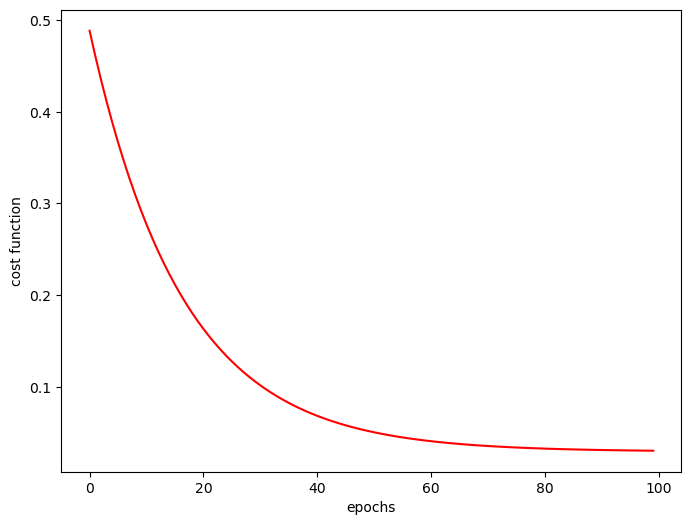

In [587]:
plt.figure(figsize = (8,6))
plt.plot(cost_array,color = 'red')
plt.xlabel('epochs')
plt.ylabel('cost function')